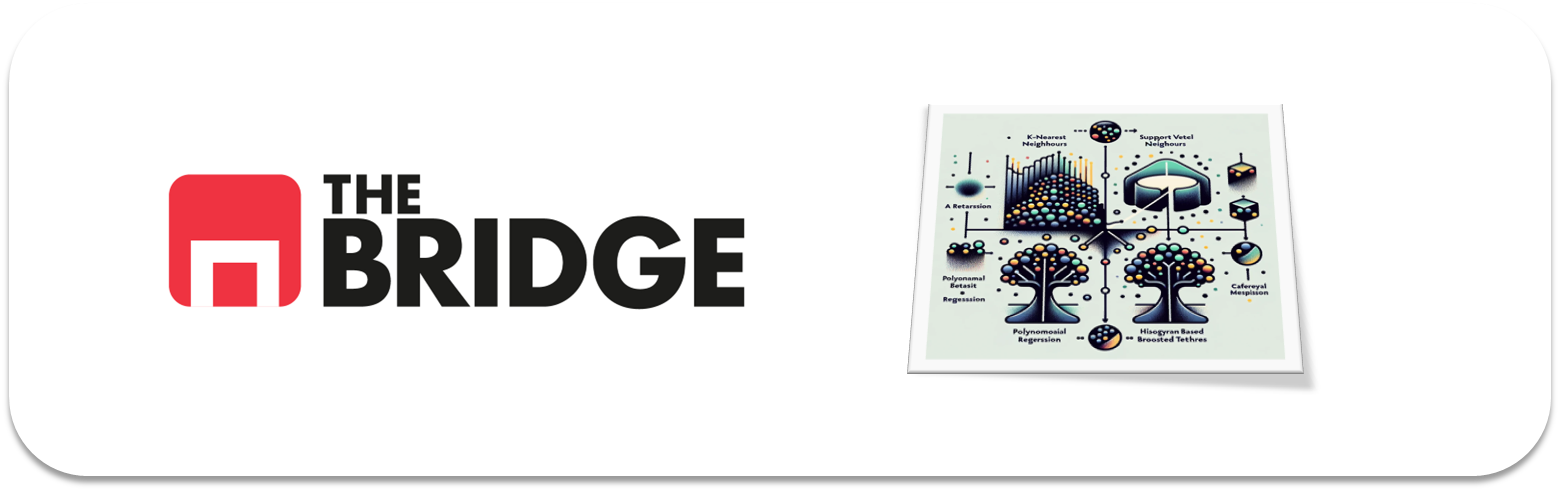

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [76]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import RAW_Toolbox as toolbox

from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [51]:
df = pd.read_csv("./data/credit_npo.csv")

In [4]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [8]:
toolbox.describe_df(df)

,COL_N,DATA_TYPE,MISSINGS(%),UNIQUE_VALUES,CARDIN(%)
0,SeriousDlqin2yrs,int64,0.000000,2,0.015953
1,RevolvingUtilizationOfUnsecuredLines,float64,0.000000,10764,85.857861
2,age,int64,0.000000,78,0.622158
3,NumberOfTime30-59DaysPastDueNotWorse,int64,0.000000,10,0.079764
4,DebtRatio,float64,0.000000,11547,92.103374
5,MonthlyIncome,float64,5.750977,4167,33.237617
6,NumberOfOpenCreditLinesAndLoans,int64,0.000000,43,0.342985
7,NumberOfTimes90DaysLate,int64,0.000000,13,0.103693
8,NumberRealEstateLoansOrLines,int64,0.000000,16,0.127622
9,NumberOfTime60-89DaysPastDueNotWorse,int64,0.000000,8,0.063811


*observamos que hay nulos en MonthlyIncome y NumberOfDependants*

In [9]:
toolbox.tipifica_variables(df, 5, 20)

,nombre_variable,tipo_sugerido
0,SeriousDlqin2yrs,Binaria
1,RevolvingUtilizationOfUnsecuredLines,Numerica Continua
2,age,Numerica Discreta
3,NumberOfTime30-59DaysPastDueNotWorse,Numerica Discreta
4,DebtRatio,Numerica Continua
5,MonthlyIncome,Numerica Continua
6,NumberOfOpenCreditLinesAndLoans,Numerica Discreta
7,NumberOfTimes90DaysLate,Numerica Discreta
8,NumberRealEstateLoansOrLines,Numerica Discreta
9,NumberOfTime60-89DaysPastDueNotWorse,Numerica Discreta


In [52]:
# Nos cargamos duplicados
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

El tipo de problema que estamos tratando es un problema de clasificación:   
- buscamos predecir a qué clase pertenecerá un individuo, en este caso, si va a encontrarse en dificultades financieras en los próximos dos años o no.  
La variable target en este caso es **"SeriousDlqin2yrs"**, que indica si una persona ha experimentado dificultades financieras graves en los últimos dos años. *

In [53]:
target = "SeriousDlqin2yrs"

### #1.3
Pinta la distribución de frecuencias del target y coméntala

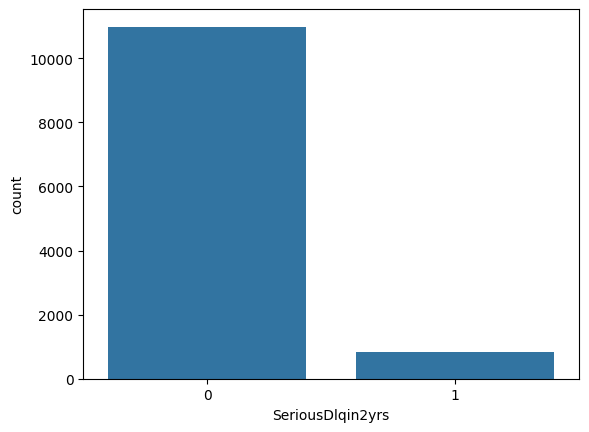

In [15]:
sns.countplot(data=df, x='SeriousDlqin2yrs');


*El dataset esta desbalanceado hacia los individuos que no han experimentado dificultades financieras graves en los últimos dos años. Notaremos su impacto al probar por ejemplo el hiperparámetro class_weight o el correspondiente al modelo seleccionado. Nos lo apuntamos porque aquí queremos ser muy precisos con la minoritaria (1)*

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [54]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [55]:
np.abs(df.corr()['SeriousDlqin2yrs']).sort_values(ascending=False)

SeriousDlqin2yrs                        1.000000
RevolvingUtilizationOfUnsecuredLines    0.280350
NumberOfTimes90DaysLate                 0.132191
NumberOfTime30-59DaysPastDueNotWorse    0.131163
age                                     0.106076
NumberOfTime60-89DaysPastDueNotWorse    0.101231
NumberOfDependents                      0.043825
NumberOfOpenCreditLinesAndLoans         0.029574
MonthlyIncome                           0.022199
DebtRatio                               0.001666
NumberRealEstateLoansOrLines            0.001321
Name: SeriousDlqin2yrs, dtype: float64

In [56]:
corr = np.abs(df.corr()['SeriousDlqin2yrs']).sort_values(ascending=False)

# Features con menos de 0.10 de correlación vs el target
bad_corr_feat = corr[corr < 0.10].index.values

# Filtramos las columnas buenas
df.drop(columns=bad_corr_feat, inplace=True)

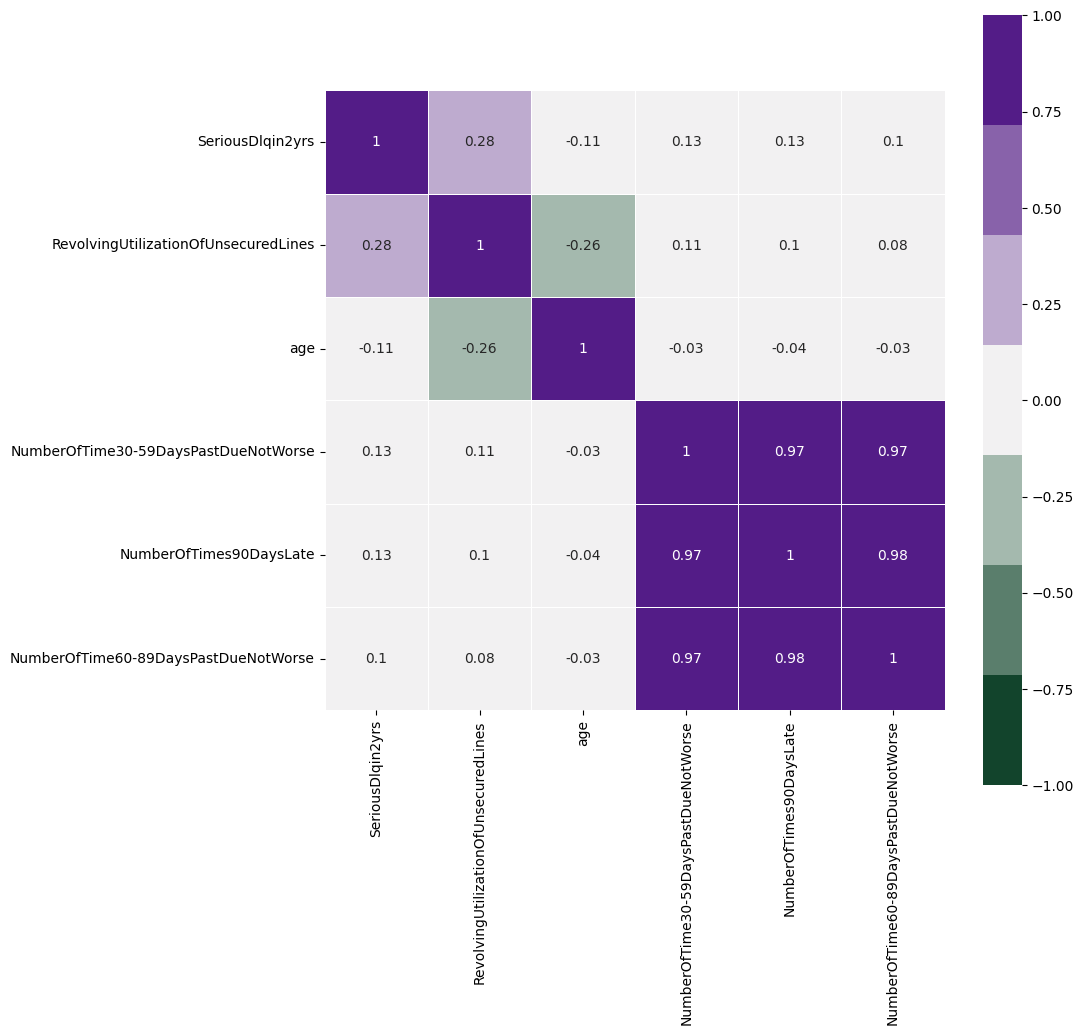

In [57]:
# miramos si las features tienen alta colinealidad con un heatmap
plt.figure(figsize=(10,10))
sns.heatmap(np.round(df.corr(), 2),
            vmin=-1,
            vmax=1,
            annot=True,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.5);

*efectivamente, NumberOfTime30-59DaysPastDueNotWorse y NumberOfTime009DaysLate tienen altisima corr, asi que voy a quitar una*

In [58]:
features = ['RevolvingUtilizationOfUnsecuredLines','age', 'NumberOfTimes90DaysLate']

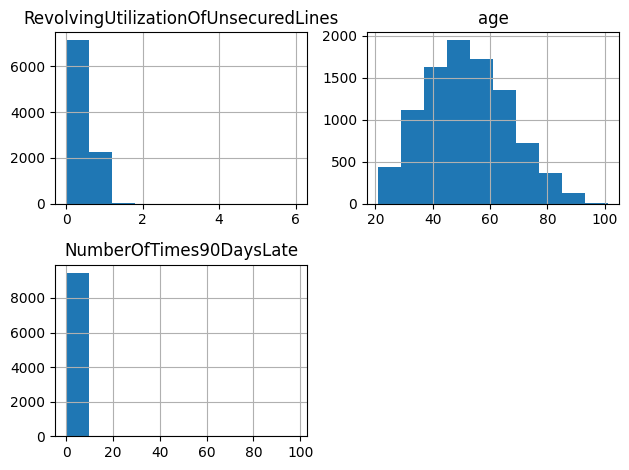

In [59]:
train_set[features].hist()
plt.tight_layout();

In [60]:
def apply_log_normalization(dataset, columns):
    for column in columns:
        dataset[column] = np.log(dataset[column] + 1)  # Agregar 1 para evitar log(0)
    return dataset

# Definir las columnas a normalizar
columns_to_normalize = ['RevolvingUtilizationOfUnsecuredLines']

# Aplicar normalización a train_set y test_set
train_set_normalized = apply_log_normalization(train_set, columns_to_normalize)
test_set_normalized = apply_log_normalization(test_set, columns_to_normalize)

In [62]:
scaler = StandardScaler()
X_train = train_set_normalized[features]
y_train = train_set_normalized[target] 
X_test = test_set_normalized[features]
y_test = test_set_normalized[target] 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features)


In [67]:
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier


model_names = ["Logistic Regression","DecisionTree","Random Forest","K Neighbors","LightGBM"]
lr_clf = LogisticRegression(max_iter = 10000)
tree_clf = DecisionTreeClassifier(random_state= 42)
rf_clf = RandomForestClassifier(random_state= 42)
knn_clf = KNeighborsClassifier(5) #neighbors = 5
lgb_clf = LGBMClassifier(random_state= 42, verbose = -100)


model_set = [lr_clf, tree_clf, rf_clf, knn_clf, lgb_clf]


In [68]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=10000)
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
KNeighborsClassifier()
LGBMClassifier(random_state=42, verbose=-100)


In [69]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, Accuracy_CV: 0.9305966161069282
Model <DecisionTree>, Accuracy_CV: 0.898645155694336
Model <Random Forest>, Accuracy_CV: 0.9177942859381251
Model <K Neighbors>, Accuracy_CV: 0.9266823354290302
Model <LightGBM>, Accuracy_CV: 0.9305961684280035
El ganador es Logistic Regression


### Optimizacion del Ganador


In [72]:
LogisticRegression
params_grid = {
    "max_iter": [1000, 2000, 5000, 10000],
    "penalty": ["l1","l2"],
    "C": [0.1,0.5,1],
    "class_weight": ["balanced",None] # era una clase desbalanceada

} 

lr_grid = GridSearchCV(lr_clf,
                       param_grid= params_grid,
                       cv = 5,
                       scoring = "accuracy",
                       n_jobs = -1)

lr_grid.fit(X_train, y_train)

C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\samue\App

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1], 'class_weight': ['balanced', None],
                         'max_iter': [1000, 2000, 5000, 10000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [73]:
lr_grid.best_score_

0.9309140204645228

In [74]:
lr_grid.best_params_

{'C': 0.1, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2'}

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2197
           1       0.62      0.03      0.06       167

    accuracy                           0.93      2364
   macro avg       0.78      0.51      0.51      2364
weighted avg       0.91      0.93      0.90      2364



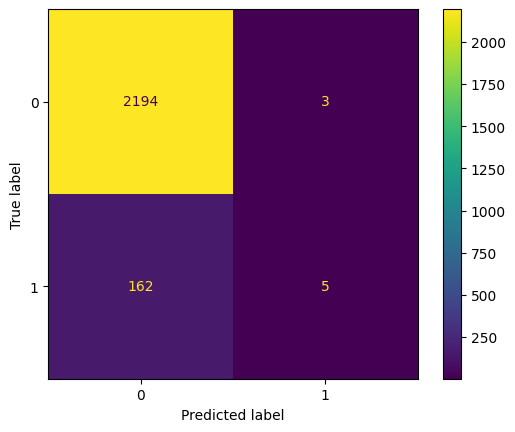

In [85]:
y_pred = lr_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

-> buen modelo, recall de 0.93 con weight_avg